In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("data.csv")
print(df.shape[0])
df.head()
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
y = df.iloc[:,2]

10


In [31]:
b0 = 0
b1 = 0
b2 = 0
beta1 = []
beta2 = []
predicted = []
err = []
alpha = 0.1
for i in range(df.shape[0]):
    z = b0 + (b1*x1[i]) + (b2*x2[i])
    pred = 1/(1+np.exp(-z))
    predicted.append(pred)
    error = pred - y[i]
    err.append(error)
    b0 = b0 + (alpha*error*pred*(1-pred))
    b1 = b1 + (alpha*error*pred*(1-pred)*x1[i])
    b2 = b2 + (alpha*error*pred*(1-pred)*x2[i])
    beta1.append(b1)
    beta2.append(b2)
print(b0,b1,b2)

0.05202905235642054 0.04059430705308911 0.16834919334987708


In [30]:
count = 0

for i in range(df.shape[0]):
    if predicted[i] > 0.5:
        predicted[i] = 1
    else:
        predicted[i] = 0
    if y[i] - predicted[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
accuracy

print(predicted)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
print(err,beta1,beta2)

[0.5, 0.5346330004173768, 0.6197851660608761, 0.6036294338827279, 0.7105832743164388, -0.12976312657617672, -0.2119081765812616, -0.20505365118136076, -0.2651512532342569, -0.2249113029877836] [0.03476355, 0.05425704318126276, 0.10386495638118644, 0.12391214986392712, 0.16868889836469242, 0.15751192889277693, 0.13864078137306762, 0.11550192543061147, 0.07068151951488647, 0.04059430705308911] [0.0318817125, 0.06330198763054706, 0.12756973919997078, 0.1542915315632064, 0.19820950442084193, 0.19416623181545803, 0.1867747223302808, 0.1808549216021913, 0.18210554427067793, 0.16834919334987708]


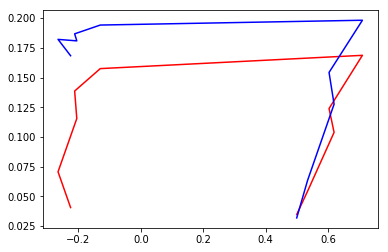

In [17]:
plt.plot(err,beta1,color = 'red')
plt.plot(err,beta2,color = 'blue')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [24]:
x = np.array(df.iloc[:,1])
x = x.reshape(-1,1)
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred = model.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
count = 0

for i in range(df.shape[0]):
    if y[i] - y_pred[i] == 0 :
        count = count + 1
accuracy = (count/df.shape[0])*100
accuracy

60.0

**CONCLUSION :IN BOTH THE CASES WE GOT AN ACCURACY OF 60% FOR ONE EPOCH**